In [2]:
'''>>>>> start CodeP4.1F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import math
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
Q1med = 1  
Q2med = 1
Xmed = 1

#create input data array
xdata = []


#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
#xdata = [[-10.0, 350, 4.464]] 
#xdata.append([-10.0, 650, 4.464]) 
#xdata.append([-10.0, 950, 4.464]) 
#xdata.append([-10.0, 1250, 4.464])
xdata.append([200.0,  100.0, 0.000])
xdata.append([200.0,  400.0, 0.000])
xdata.append([200.0,  200.0, 0.000])
xdata.append([500.0,  400.0, 0.000])
xdata.append([100.0,  300.0, 0.000])
xdata.append([600.0,  300.0, 0.002])
xdata.append([500.0,  400.0, 0.002])
xdata.append([200.,  400.0, 0.002])
xdata.append([100.0,  300.0, 0.002])
xdata.append([200.0,  200.0, 0.002])
xdata.append([200.0,  100.0, 0.002])
xdata.append([100.0,  200.0, 0.002])
xdata.append([500.0,  400.0, 0.004])
xdata.append([300.0,  400.0, 0.004])
xdata.append([200.0,  400.0, 0.004])
xdata.append([100.0,  400.0, 0.004])
xdata.append([100.0,  300.0, 0.004])
xdata.append([200.0,  300.0, 0.004])
xdata.append([500.0,  300.0, 0.004])
xdata.append([200.0,  100.0, 0.004])
xdata.append([100.0,  200.0, 0.004])
xdata.append([200.0,  200.0, 0.004])
xdata.append([300.0,  200.0, 0.004])
xdata.append([100.0,  300.0, 0.006])
xdata.append([200.0,  400.0, 0.006])
xdata.append([400.0,  200.0, 0.006])
xdata.append([600.0,  300.0, 0.006])
xdata.append([300.0,  600.0, 0.006])
xdata.append([200.0,  100.0, 0.006])
xdata.append([100.0,  200.0, 0.006])
xdata.append([50.0,  200.0, 0.006])
xdata.append([350.0,  150.0, 0.004])
xdata.append([350.0,  150.0, 0.008])
xdata.append([300.0,  200.0, 0.008])
xdata.append([200.0,  100.0, 0.008])
xdata.append([250.0,  50.0, 0.008])
xdata.append([50.0,  250.0, 0.008])
xdata.append([400.0,  300.0, 0.008])
xdata.append([500.0,  400.0, 0.008])
xdata.append([50.0,  200.0, 0.010])
xdata.append([100.0,  200.0, 0.010])
xdata.append([200.0,  200.0, 0.010])
xdata.append([300.0,  200.0, 0.010])
xdata.append([500.0,  400.0, 0.010])
xdata.append([400.0,  300.0, 0.010])
xdata.append([100.0,  100.0, 0.010])
xdata.append([200.0,  100.0, 0.010])



''' ADD THE REST OF THE INPUT DATA AND CONVERT TO:
xdata = [[-10.0/Tamed, 350/IDmed, 4.464/RLmed]] 
xdata.append([-10.0/Tamed, 650/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 950/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 1250/IDmed, 4.464/RLmed]) 
... etc.'''



# define meadian values of input variables - add your values here

Tmed = 1

#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata.append([54.3])
ydata.append([72.2])
ydata.append([56.0])
ydata.append([77.2])
ydata.append([62.8])
ydata.append([84.6])
ydata.append([77.2])
ydata.append([71.6])
ydata.append([62.4])
ydata.append([55.3])
ydata.append([54.3]) 
ydata.append([55.5]) 
ydata.append([77.2])
ydata.append([72.2])
ydata.append([71.1])
ydata.append([70.2])
ydata.append([62.2])
ydata.append([63.2])
ydata.append([77.2])
ydata.append([54.3]) 
ydata.append([55.2])
ydata.append([56.4])
ydata.append([61.4])
ydata.append([62.0])
ydata.append([70.8])
ydata.append([69.5])
ydata.append([84.6])
ydata.append([86.4])
ydata.append([54.3])
ydata.append([55.0]) 
ydata.append([54.6])
ydata.append([65.5])
ydata.append([65.5])
ydata.append([61.4])
ydata.append([54.3])
ydata.append([57.1])
ydata.append([57.4])
ydata.append([69.5])
ydata.append([77.2])
ydata.append([54.5])
ydata.append([54.8])
ydata.append([55.5]) 
ydata.append([61.4])
ydata.append([77.2])
ydata.append([69.5])
ydata.append([44.9]) 
ydata.append([54.3]) 


''' ADD THE REST OF THE OUPUT DATA AND CONVERT TO:
ydata = [[18.9/VLmed, 80.3/Wdmed]] 
ydata.append([23.5/VLmed, 124.6/Wdmed]) 
ydata.append([24.8/VLmed, 138.6/Wdmed]) 
ydata.append([25.6/VLmed, 146.9/Wdmed]) 
... etc.'''

xarray= np.array(xdata)
yarray= np.array(ydata)
Q1med= np.median(xarray[:,0])
Q2med= np.median(xarray[:,1])
Xmed= np.median(xarray[:,2])
Tmed= np.median(yarray[:,0])



Xmedian = [Q1med,Q2med,Xmed]   # determine median value, divide
Ymedian = [Tmed]
X_nor=xarray/Xmedian
Y_nor=yarray/Ymedian
print(Q1med)
print(Q2med)
print(Xmed)
print(Tmed)
print(X_nor)
print(Y_nor)

200.0
200.0
0.004
62.2
[[1.   0.5  0.  ]
 [1.   2.   0.  ]
 [1.   1.   0.  ]
 [2.5  2.   0.  ]
 [0.5  1.5  0.  ]
 [3.   1.5  0.5 ]
 [2.5  2.   0.5 ]
 [1.   2.   0.5 ]
 [0.5  1.5  0.5 ]
 [1.   1.   0.5 ]
 [1.   0.5  0.5 ]
 [0.5  1.   0.5 ]
 [2.5  2.   1.  ]
 [1.5  2.   1.  ]
 [1.   2.   1.  ]
 [0.5  2.   1.  ]
 [0.5  1.5  1.  ]
 [1.   1.5  1.  ]
 [2.5  1.5  1.  ]
 [1.   0.5  1.  ]
 [0.5  1.   1.  ]
 [1.   1.   1.  ]
 [1.5  1.   1.  ]
 [0.5  1.5  1.5 ]
 [1.   2.   1.5 ]
 [2.   1.   1.5 ]
 [3.   1.5  1.5 ]
 [1.5  3.   1.5 ]
 [1.   0.5  1.5 ]
 [0.5  1.   1.5 ]
 [0.25 1.   1.5 ]
 [1.75 0.75 1.  ]
 [1.75 0.75 2.  ]
 [1.5  1.   2.  ]
 [1.   0.5  2.  ]
 [1.25 0.25 2.  ]
 [0.25 1.25 2.  ]
 [2.   1.5  2.  ]
 [2.5  2.   2.  ]
 [0.25 1.   2.5 ]
 [0.5  1.   2.5 ]
 [1.   1.   2.5 ]
 [1.5  1.   2.5 ]
 [2.5  2.   2.5 ]
 [2.   1.5  2.5 ]
 [0.5  0.5  2.5 ]
 [1.   0.5  2.5 ]]
[[0.87299035]
 [1.1607717 ]
 [0.90032154]
 [1.24115756]
 [1.0096463 ]
 [1.36012862]
 [1.24115756]
 [1.1511254 ]
 [1.00321543]
 [0.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_nor, Y_nor, test_size=1/4)

In [9]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([   # dense层：全连接   activation:激活函数
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(1,  kernel_initializer=initializer)
  ])


In [22]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.000020)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [23]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(   #callback:回调函数
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(X_train,Y_train,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
35/35 [==============================] - 1s 22ms/step - loss: 0.0315
Epoch 2/500
35/35 [==============================] - 0s 212us/step - loss: 0.0316
Epoch 3/500
35/35 [==============================] - 0s 265us/step - loss: 0.0316
Epoch 4/500
35/35 [==============================] - 0s 495us/step - loss: 0.0316
Epoch 5/500
35/35 [==============================] - 0s 742us/step - loss: 0.0315
Epoch 6/500
35/35 [==============================] - 0s 523us/step - loss: 0.0315
Epoch 7/500
35/35 [==============================] - 0s 744us/step - loss: 0.0315
Epoch 8/500
35/35 [==============================] - 0s 389us/step - loss: 0.0315
Epoch 9/500
35/35 [==============================] - 0s 584us/step - loss: 0.0315
Epoch 10/500
35/35 [==============================] - 0s 466us/step - loss: 0.0315
Epoch 11/500
35/35 [==============================] - 0s 388us/step - loss: 0.0315
Epoch 12/500
35/35 [==============================] - 0s 538us/step - loss: 0.0315
Epoch 13/500
3

35/35 [==============================] - 0s 266us/step - loss: 0.0315
Epoch 100/500
35/35 [==============================] - 0s 346us/step - loss: 0.0315
Epoch 101/500
35/35 [==============================] - 0s 376us/step - loss: 0.0315
Epoch 102/500
35/35 [==============================] - 0s 458us/step - loss: 0.0315
Epoch 103/500
35/35 [==============================] - 0s 431us/step - loss: 0.0315
Epoch 104/500
35/35 [==============================] - 0s 506us/step - loss: 0.0315
Epoch 105/500
35/35 [==============================] - ETA: 0s - loss: 0.027 - 0s 541us/step - loss: 0.0315
Epoch 106/500
35/35 [==============================] - 0s 734us/step - loss: 0.0315
Epoch 107/500
35/35 [==============================] - 0s 505us/step - loss: 0.0315
Epoch 108/500
35/35 [==============================] - 0s 456us/step - loss: 0.0315
Epoch 109/500
35/35 [==============================] - 0s 373us/step - loss: 0.0315
Epoch 110/500
35/35 [==============================] - 0s 567us/st

35/35 [==============================] - 0s 416us/step - loss: 0.0315
Epoch 196/500
35/35 [==============================] - 0s 344us/step - loss: 0.0315
Epoch 197/500
35/35 [==============================] - 0s 534us/step - loss: 0.0315
Epoch 198/500
35/35 [==============================] - 0s 463us/step - loss: 0.0315
Epoch 199/500
35/35 [==============================] - 0s 634us/step - loss: 0.0315
Epoch 200/500
35/35 [==============================] - 0s 836us/step - loss: 0.0315
Epoch 201/500
35/35 [==============================] - 0s 540us/step - loss: 0.0315
Epoch 202/500
35/35 [==============================] - 0s 319us/step - loss: 0.0315
Epoch 203/500
35/35 [==============================] - 0s 285us/step - loss: 0.0315
Epoch 204/500
35/35 [==============================] - 0s 294us/step - loss: 0.0315
Epoch 205/500
35/35 [==============================] - 0s 306us/step - loss: 0.0315
Epoch 206/500
35/35 [==============================] - 0s 333us/step - loss: 0.0315
Epoch 

35/35 [==============================] - 0s 408us/step - loss: 0.0315
Epoch 293/500
35/35 [==============================] - 0s 237us/step - loss: 0.0315
Epoch 294/500
35/35 [==============================] - 0s 378us/step - loss: 0.0315
Epoch 295/500
35/35 [==============================] - 0s 240us/step - loss: 0.0315
Epoch 296/500
35/35 [==============================] - 0s 259us/step - loss: 0.0315
Epoch 297/500
35/35 [==============================] - 0s 234us/step - loss: 0.0315
Epoch 298/500
35/35 [==============================] - 0s 359us/step - loss: 0.0315
Epoch 299/500
35/35 [==============================] - 0s 280us/step - loss: 0.0315
Epoch 300/500
35/35 [==============================] - 0s 547us/step - loss: 0.0315
Epoch 301/500
35/35 [==============================] - 0s 574us/step - loss: 0.0315
Epoch 302/500
35/35 [==============================] - 0s 1ms/step - loss: 0.0315
Restoring model weights from the end of the best epoch
Epoch 00302: early stopping
best epoc

In [24]:
test = []
outpt=[]

for i in range(len(X_train)):
    
    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    print ('row [0] data: q1= ', X_train[i][0]*Q1med, ', q2= ', X_train[i][1]*Q2med, \
        ', x= ', X_train[i][2]*Xmed,', max_surface_temp= ', Y_train[i][0]*Tmed,\
        ',  data value max_surface_temp = ', outpt[0][0]*Tmed)

row [0] data: q1=  100.0 , q2=  300.0 , x=  0.004 , max_surface_temp=  62.2 ,  data value max_surface_temp =  60.5557567358017
row [0] data: q1=  200.0 , q2=  100.0 , x=  0.0 , max_surface_temp=  54.3 ,  data value max_surface_temp =  54.052505505084994
row [0] data: q1=  200.0 , q2=  300.0 , x=  0.004 , max_surface_temp=  63.20000000000001 ,  data value max_surface_temp =  64.51153237819672
row [0] data: q1=  300.0 , q2=  400.0 , x=  0.004 , max_surface_temp=  72.2 ,  data value max_surface_temp =  72.81572051048279
row [0] data: q1=  400.0 , q2=  300.0 , x=  0.008 , max_surface_temp=  69.5 ,  data value max_surface_temp =  70.4395605802536
row [0] data: q1=  300.0 , q2=  200.0 , x=  0.004 , max_surface_temp=  61.4 ,  data value max_surface_temp =  62.75849890708923
row [0] data: q1=  200.0 , q2=  400.0 , x=  0.004 , max_surface_temp=  71.1 ,  data value max_surface_temp =  69.76649532318116
row [0] data: q1=  100.0 , q2=  200.0 , x=  0.002 , max_surface_temp=  55.5 ,  data value max_

In [28]:
pred_max_surface_temp=[]
data_value_max_surface_temp=[]
test=[]
for i in range(len(X_train)):

    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    pred_max_surface_temp.append(Y_train[i][0]*Tmed)
    data_value_max_surface_temp.append(outpt[0][0]*Tmed)

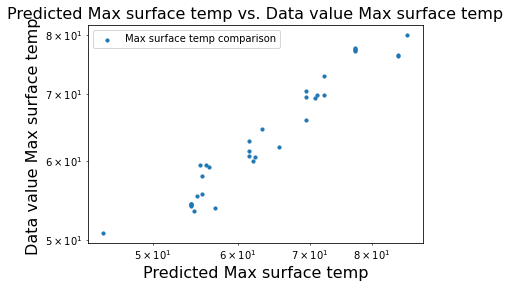

In [29]:
import matplotlib.pyplot as plt
plt.scatter(pred_max_surface_temp,data_value_max_surface_temp,s=10, label='Max surface temp comparison')
plt.ylabel(r'Data value Max surface temp ',fontsize = 16)
plt.xlabel(r'Predicted Max surface temp',fontsize = 16)
plt.title('Predicted Max surface temp vs. Data value Max surface temp',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [34]:
test1 = []
outpt1=[]

for i in range(len(Y_test)):
    
    test1 = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray1 = np.array(test1)
    outpt1 = model.predict(testarray1)
    
    print ('row [0] data: q1= ', X_train[i][0]*Q1med, ', q2= ', X_train[i][1]*Q2med, \
        ', x= ', X_train[i][2]*Xmed,', max_surface_temp= ', Y_train[i][0]*Tmed,\
        ',  normalized max_surface_temp = ', Y_test[i][0]*Tmed)

row [0] data: q1=  100.0 , q2=  300.0 , x=  0.004 , max_surface_temp=  62.2 ,  normalized max_surface_temp =  77.2
row [0] data: q1=  200.0 , q2=  100.0 , x=  0.0 , max_surface_temp=  54.3 ,  normalized max_surface_temp =  54.5
row [0] data: q1=  200.0 , q2=  300.0 , x=  0.004 , max_surface_temp=  63.20000000000001 ,  normalized max_surface_temp =  54.3
row [0] data: q1=  300.0 , q2=  400.0 , x=  0.004 , max_surface_temp=  72.2 ,  normalized max_surface_temp =  71.6
row [0] data: q1=  400.0 , q2=  300.0 , x=  0.008 , max_surface_temp=  69.5 ,  normalized max_surface_temp =  55.2
row [0] data: q1=  300.0 , q2=  200.0 , x=  0.004 , max_surface_temp=  61.4 ,  normalized max_surface_temp =  57.4
row [0] data: q1=  200.0 , q2=  400.0 , x=  0.004 , max_surface_temp=  71.1 ,  normalized max_surface_temp =  70.2
row [0] data: q1=  100.0 , q2=  200.0 , x=  0.002 , max_surface_temp=  55.5 ,  normalized max_surface_temp =  62.4
row [0] data: q1=  200.0 , q2=  200.0 , x=  0.01 , max_surface_temp= 

In [37]:
predict_max_surface_temp=[]
normalized_max_surface_temp=[]
testpower=[]
test_=[]
for i in range(len(X_test)):
    test_ = [[ X_test[i][0] , X_test[i][1] , X_test[i][2]]]
    testarray = np.array(test_)
    testpower = model.predict(testarray)
    predict_max_surface_temp.append(Y_test[i][0]*Tmed)
    normalized_max_surface_temp.append(testpower[0][0]*Tmed)

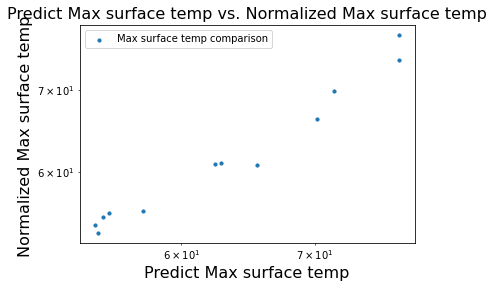

In [39]:
import matplotlib.pyplot as plt
plt.scatter(predict_max_surface_temp,normalized_max_surface_temp,s=10, label='Max surface temp comparison')
plt.ylabel(r'Normalized Max surface temp ',fontsize = 16)
plt.xlabel(r'Predict Max surface temp',fontsize = 16)
plt.title('Predict Max surface temp vs. Normalized Max surface temp',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.






